In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ht = pd.read_csv('C:/Users/he125/OneDrive/바탕 화면/Dev/Git/py_machineLearning/Assignment_Group/ML_group_project/hotel_bookings.csv')

# Basic EDA

In [4]:
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **호텔 타입**

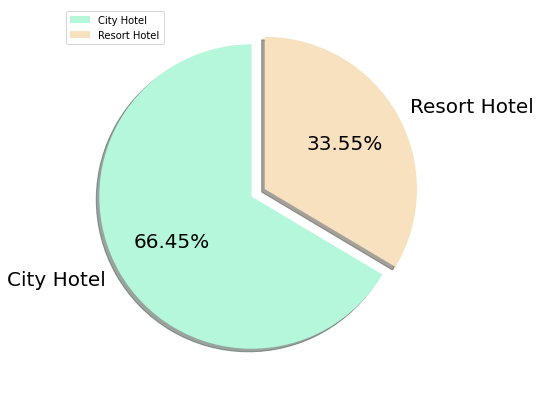

In [ ]:
hotel = ["City Hotel", "Resort Hotel"]
booking = df_ht.hotel.value_counts()
color = ['#b5f7da', "#f8e1be"]

plt.figure(figsize = (10, 7))
plt.pie(booking, labels = hotel, colors = color, explode = (0, 0.1), textprops = {'color':"black",'size':20}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend()

plt.show();

### **Meal Types : 도넛차트**
식사 타입은 BB, HB, SC, undefined, FB 순으로 많이 예약(이용)된다.<br>
각각의 타입은 검색으로 알아볼 필요

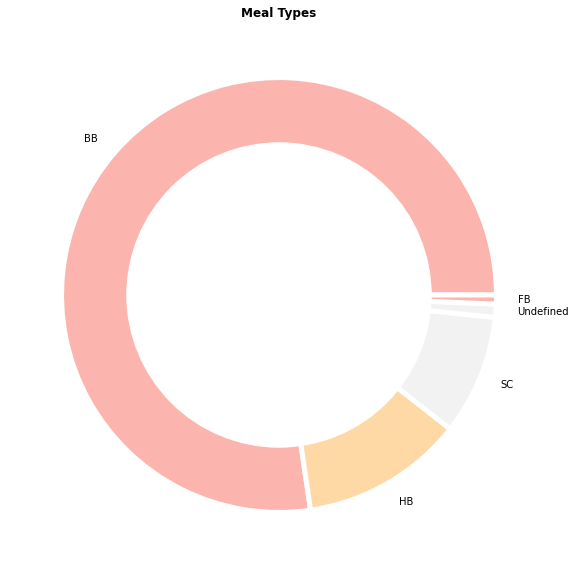

In [151]:
# 도넛차트

meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = df_ht['meal'].value_counts()
plt.figure(figsize=(10,10))

#색 지정
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(4)*4)

my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size,
        labels=meal_labels,
        colors=colors,
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Meal Types', weight='bold')
plt.show()

In [123]:
df_ht["meal"].agg(["value_counts"])

,value_counts
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


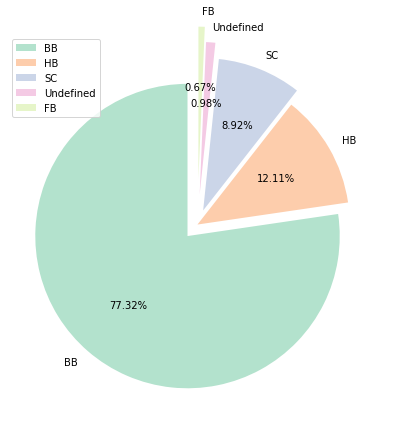

In [154]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = df_ht.meal.value_counts()
plt.get_cmap()
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(5)*1)

plt.figure(figsize = (10, 7))
plt.pie(values, labels = meal,
        colors=colors
        ,explode = (0.1, 0, 0.1, 0.2, 0.3), autopct = "%.2f%%",startangle = 90)

plt.legend()

plt.show();

### **아이들을 동반한 팀의 선호 식사예약 타입**

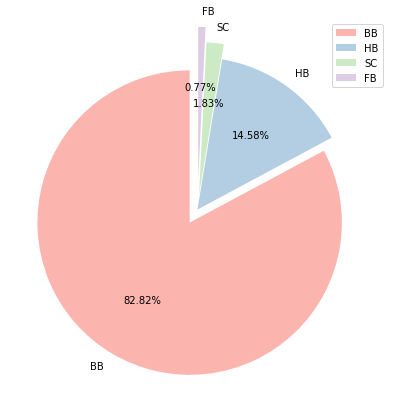

In [162]:
df_ht.iloc[np.where((df_ht["children"] > 0) & (df_ht["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

meal = ["BB", "HB", "SC", "FB"]
values = [7079, 1246, 156, 66]

plt.get_cmap()
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(5)*1)

plt.figure(figsize = (10, 7))
plt.pie(values, labels = meal,
        colors= colors,
        explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.legend()

plt.show();

### **아기들을 동반한 팀의 선호 식사예약 타입**

In [163]:
df_ht.iloc[np.where((df_ht["babies"] > 0) & (df_ht["meal"] != "Undefined"))]["meal"].agg(["value_counts"])

,value_counts
BB,662
HB,178
SC,37
FB,24


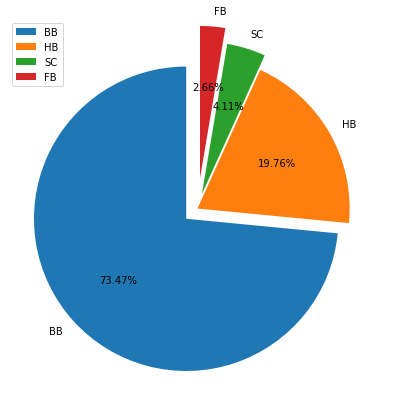

In [164]:
meal = ["BB", "HB", "SC", "FB"]
values = [662, 178, 37, 24]

plt.figure(figsize = (10, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.legend()

plt.show();

### **보증금 형태**

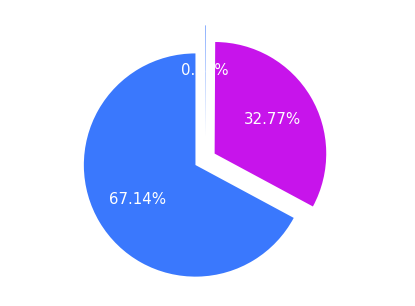

In [121]:
deposit = ["No Deposit", "Non Refund", "Refundable"]
count = [29694, 14494, 36]
color = ['#3a78fd', "#c714eb"]

plt.figure(figsize = (5, 7)) 
plt.pie(count, labels = deposit,
        textprops = {'color':"w",'size':15},
        colors=color,
        explode = (0.1, 0.1, 0.2), autopct = "%.2f%%", startangle = 90)

plt.show();

In [ ]:
# After cleaning, separate Resort and City hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
rh = df_ht.loc[(df_ht["hotel"] == "Resort Hotel") & (df_ht["is_canceled"] == 0)]
ch = df_ht.loc[(df_ht["hotel"] == "City Hotel") & (df_ht["is_canceled"] == 0)]

### **Market segment 비율 : 파이 차트**
주의 : 해당 파이 차트에는 예약취소자도 포함시켰다.

Online TA, Offline TA, Groups, Direct, Corporate, Complementary, Aviation, Undefined 순으로 나타난다.<br>

아래의 링크를 참고하여 
https://www.ratehawk.com/lp/en/to-and-ta/

In [ ]:
# market segments ratio : pie chart

segments=df_ht["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Market segment ratio",
             template="seaborn",
             color_discrete_sequence = px.colors.sequential.Magenta)
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

### **국가분포 : Pie & Map**

아래에서 살펴볼 수 있 듯, 
포르투(내국), 영국, 프랑스, 스페인, 독일, 아일랜드 ...etc 로 인근 EU 내에서 많이 찾는 것으로 보인다.

In [ ]:
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')
import chart_studio.plotly as py
import plotly.express as px

chart_studio
# 방문 안한 고객을 제외한 실방문자만을 추출
df_ctr = pd.DataFrame(df_ht.loc[df_ht["is_canceled"] == 0]["country"].value_counts())

#
df_ctr.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = df_ctr["Number of Guests"].sum()
df_ctr["Guests in %"] = round(df_ctr["Number of Guests"] / total_guests * 100, 2)
df_ctr["country"] = df_ctr.index

# pie plot
fig = px.pie(df_ctr,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn",
             color_discrete_sequence = px.colors.sequential.Pinkyl_r)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [71]:
# show on map
import plotly.graph_objects as go

fig = go.Figure()

guest_map = px.choropleth(df_ctr,
                    locations=df_ctr.index,
                    color=df_ctr["Guests in %"], 
                    hover_name=df_ctr.index, 
                    color_continuous_scale=px.colors.sequential.Hot,
                    title='Which countries are our main customers?',)

guest_map.show()

### **Features에 따른 ADR 탐색**

In [84]:
# adr에 대한 영향력이 미미한 아기를 제외하여 adr을 책정함
df_ht["adr_pp"] = df_ht["adr"] / (df_ht["adults"] + df_ht["children"])

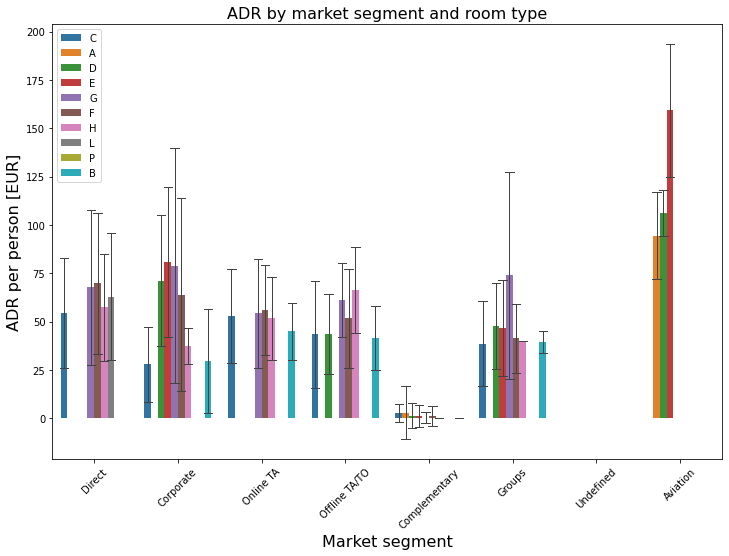

In [166]:
# price per night (ADR) and person based on booking and room.
# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=df_ht,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

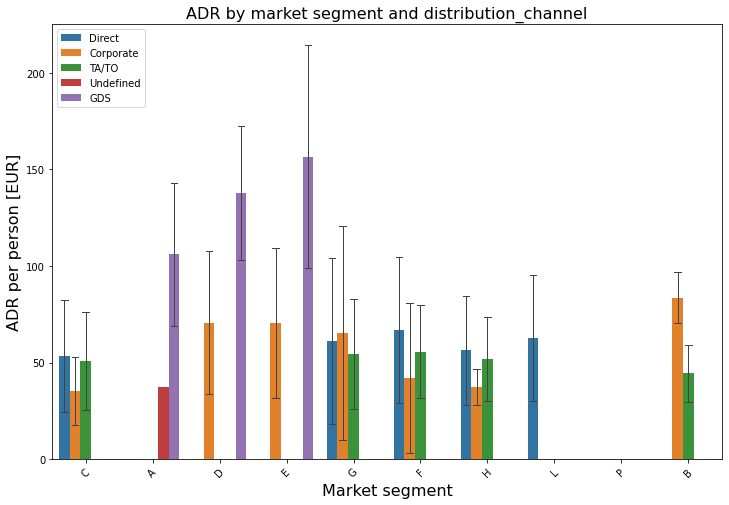

In [165]:
# price per night (ADR) and person based on booking and room.
# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x="reserved_room_type",
            y="adr_pp",
            hue="distribution_channel",
            data=df_ht,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and distribution_channel", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()